<a href="https://colab.research.google.com/github/jayy1809/Air-Quality-Index--AQI-/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [523]:
df = pd.read_csv('city_day.csv')

In [524]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [525]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [526]:
df.shape

(29531, 16)

HERE WE HAVE 24146 data entries

In [527]:
df2 = df.dropna()

In [528]:
len(df2)

6236

AFTER DROPPING EVERYTHING WE ONLY HAVE 5000 data entries left ,
so dropping is not the best thing we could do so lets have an another approach


In [529]:
df_filtered = df.drop(columns=['Xylene'])

as xylene had a lot of missing values we just deleted that thing


In [530]:
df_filtered.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
AQI            4681
AQI_Bucket     4681
dtype: int64

In [531]:
df_filtered.dropna(subset=['AQI','AQI_Bucket'], inplace=True)

In [532]:
df_filtered.isnull().sum()

City             0
Date             0
PM2.5          678
PM10          7086
NO             387
NO2            391
NOx           1857
NH3           6536
CO             445
SO2            605
O3             807
Benzene       3535
Toluene       5826
AQI              0
AQI_Bucket       0
dtype: int64

In [533]:

df_filtered["PM2.5"].fillna(df_filtered["PM2.5"].mean(),inplace=True)

df_filtered["PM10"].fillna(df_filtered["PM10"].mean(),inplace=True)

df_filtered["NO"].fillna(df_filtered["NO"].mean(),inplace=True)

df_filtered["NO2"].fillna(df_filtered["NO2"].mean(),inplace=True)

df_filtered["NOx"].fillna(df_filtered["NOx"].mean(),inplace=True)

df_filtered["NH3"].fillna(df_filtered["NH3"].mean(),inplace=True)

df_filtered["CO"].fillna(df_filtered["CO"].mean(),inplace=True)

df_filtered["SO2"].fillna(df_filtered["SO2"].mean(),inplace=True)

df_filtered["O3"].fillna(df_filtered["O3"].mean(),inplace=True)

df_filtered["Benzene"].fillna(df_filtered["Benzene"].mean(),inplace=True)

df_filtered["Toluene"].fillna(df_filtered["Toluene"].mean(),inplace=True)

In [534]:
df_filtered.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

<Axes: >

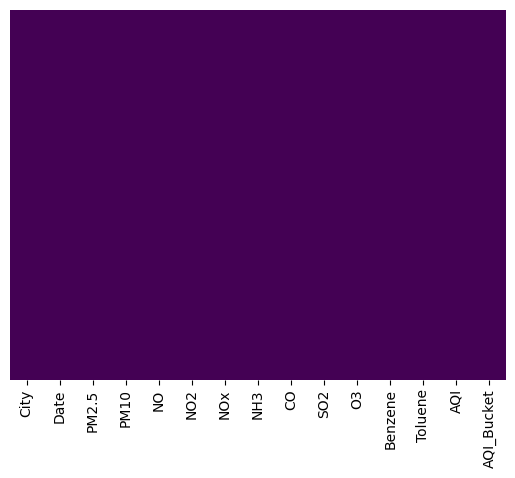

In [535]:
sns.heatmap(df_filtered.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [536]:
df_filtered.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,914.0,Severe


In [537]:
X = df_filtered.drop(columns=['AQI', 'AQI_Bucket']).values # getting all the independent features
y = df_filtered[['AQI', 'AQI_Bucket']].values # getting all the target variables or say dependent features

In [538]:
import numpy as np
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



In [539]:
# df_filtered['Date'] = pd.to_datetime(df['Date'])

In [540]:
# df_filtered.set_index('Date', inplace=True)

In [541]:
df_encoded = pd.get_dummies(df_filtered, columns=['City'])

# Display the DataFrame after encoding
df_encoded.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
28,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,...,False,False,False,False,False,False,False,False,False,False
29,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,...,False,False,False,False,False,False,False,False,False,False
30,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,...,False,False,False,False,False,False,False,False,False,False
31,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,...,False,False,False,False,False,False,False,False,False,False
32,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,...,False,False,False,False,False,False,False,False,False,False


In [542]:
df_encoded.dtypes


Date                        object
PM2.5                      float64
PM10                       float64
NO                         float64
NO2                        float64
NOx                        float64
NH3                        float64
CO                         float64
SO2                        float64
O3                         float64
Benzene                    float64
Toluene                    float64
AQI                        float64
AQI_Bucket                  object
City_Ahmedabad                bool
City_Aizawl                   bool
City_Amaravati                bool
City_Amritsar                 bool
City_Bengaluru                bool
City_Bhopal                   bool
City_Brajrajnagar             bool
City_Chandigarh               bool
City_Chennai                  bool
City_Coimbatore               bool
City_Delhi                    bool
City_Ernakulam                bool
City_Gurugram                 bool
City_Guwahati                 bool
City_Hyderabad      

In [543]:
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'])

# Check the updated data types
print(df_encoded.dtypes)

Date                       datetime64[ns]
PM2.5                             float64
PM10                              float64
NO                                float64
NO2                               float64
NOx                               float64
NH3                               float64
CO                                float64
SO2                               float64
O3                                float64
Benzene                           float64
Toluene                           float64
AQI                               float64
AQI_Bucket                         object
City_Ahmedabad                       bool
City_Aizawl                          bool
City_Amaravati                       bool
City_Amritsar                        bool
City_Bengaluru                       bool
City_Bhopal                          bool
City_Brajrajnagar                    bool
City_Chandigarh                      bool
City_Chennai                         bool
City_Coimbatore                   

In [544]:
X = df_encoded.drop(columns=['AQI', 'AQI_Bucket'])
y = df_encoded[['AQI', 'AQI_Bucket']]

In [545]:
X.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
28,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,...,False,False,False,False,False,False,False,False,False,False
29,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,...,False,False,False,False,False,False,False,False,False,False
30,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,...,False,False,False,False,False,False,False,False,False,False
31,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,...,False,False,False,False,False,False,False,False,False,False
32,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,...,False,False,False,False,False,False,False,False,False,False


In [546]:
y.head()

,AQI,AQI_Bucket
28,209.0,Poor
29,328.0,Very Poor
30,514.0,Severe
31,782.0,Severe
32,914.0,Severe


In [547]:
# X = X.values

In [548]:
# X

In [549]:
unique_categories = df_filtered['AQI_Bucket'].unique()
len(unique_categories)

6

In [550]:
y.head()

,AQI,AQI_Bucket
28,209.0,Poor
29,328.0,Very Poor
30,514.0,Severe
31,782.0,Severe
32,914.0,Severe


In [551]:
y = pd.get_dummies(y, columns=['AQI_Bucket'])

# Drop the original 'AQI_Bucket' column
y.drop(columns=['AQI_Bucket'], inplace=True)

KeyError: "['AQI_Bucket'] not found in axis"

In [552]:
y.head()

,AQI,AQI_Bucket_Good,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
28,209.0,False,False,True,False,False,False
29,328.0,False,False,False,False,False,True
30,514.0,False,False,False,False,True,False
31,782.0,False,False,False,False,True,False
32,914.0,False,False,False,False,True,False


In [553]:
y.dtypes

AQI                        float64
AQI_Bucket_Good               bool
AQI_Bucket_Moderate           bool
AQI_Bucket_Poor               bool
AQI_Bucket_Satisfactory       bool
AQI_Bucket_Severe             bool
AQI_Bucket_Very Poor          bool
dtype: object

In [554]:
y = y['AQI']

In [555]:
y.head()

28    209.0
29    328.0
30    514.0
31    782.0
32    914.0
Name: AQI, dtype: float64

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape (X, y):", X_train.shape, y_train.shape)
print("Testing data shape (X, y):", X_test.shape, y_test.shape)

Training data shape (X, y): (19880, 38) (19880,)
Testing data shape (X, y): (4970, 38) (4970,)


In [557]:
# X_train.head()

In [558]:
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['DayOfWeek'] = X_train['Date'].dt.dayofweek

X_test['Year'] = X_test['Date'].dt.year
X_test['Month'] = X_test['Date'].dt.month
X_test['DayOfWeek'] = X_test['Date'].dt.dayofweek

# Drop the original 'Date' column


X_train_values = X_train.drop(columns=['Date']).values
X_test_values = X_test.drop(columns=['Date']).values

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_values)
X_test_scaled = scaler.transform(X_test_values)

In [576]:
pd.set_option('display.max_columns', None)
X_train.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,City_Ahmedabad,City_Aizawl,City_Amaravati,City_Amritsar,City_Bengaluru,City_Bhopal,City_Brajrajnagar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Gurugram,City_Guwahati,City_Hyderabad,City_Jaipur,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,Year,Month,DayOfWeek
2405,2018-09-03,21.81,78.680000,12.19,23.75,22.67,21.760000,1.64,11.80,29.05,0.090000,0.070000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,9,0
7821,2020-06-19,16.34,50.900000,0.88,8.53,5.21,35.900000,0.31,7.94,42.03,2.900000,0.390000,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2020,6,4
19999,2015-06-03,71.26,118.454435,3.94,15.29,4.48,23.848366,2.43,7.48,43.95,0.940000,0.930000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2015,6,2
27568,2019-02-17,32.90,64.890000,0.93,5.37,3.61,4.330000,0.67,2.44,53.57,3.458668,9.525714,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,2019,2,6
11403,2018-03-20,109.99,249.200000,44.27,55.71,82.08,44.260000,1.42,20.52,51.95,3.190000,7.160000,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018,3,1


In [574]:
X_train.columns

Index(['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'City_Ahmedabad', 'City_Aizawl', 'City_Amaravati',
       'City_Amritsar', 'City_Bengaluru', 'City_Bhopal', 'City_Brajrajnagar',
       'City_Chandigarh', 'City_Chennai', 'City_Coimbatore', 'City_Delhi',
       'City_Ernakulam', 'City_Gurugram', 'City_Guwahati', 'City_Hyderabad',
       'City_Jaipur', 'City_Jorapokhar', 'City_Kochi', 'City_Kolkata',
       'City_Lucknow', 'City_Mumbai', 'City_Patna', 'City_Shillong',
       'City_Talcher', 'City_Thiruvananthapuram', 'City_Visakhapatnam', 'Year',
       'Month', 'DayOfWeek'],
      dtype='object')

In [575]:
len(X_train.columns)

41

In [560]:
y_train.head()

2405      94.0
7821      82.0
19999    189.0
27568     78.0
11403    224.0
Name: AQI, dtype: float64

In [561]:
y_train_values = y_train.values
y_test_values = y_test.values

array([ 94.,  82., 189., ..., 789.,  88.,  35.])

In [562]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


In [563]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on test data
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Mean Absolute Error on Test Data:", mae)


Epoch 1/25
497/497 [==============================] - 2s 3ms/step - loss: 22306.8379 - mae: 96.6398 - val_loss: 9427.6279 - val_mae: 60.6607
Epoch 2/25
497/497 [==============================] - 2s 4ms/step - loss: 7635.9360 - mae: 51.8331 - val_loss: 5855.2627 - val_mae: 44.2617
Epoch 3/25
497/497 [==============================] - 1s 2ms/step - loss: 5878.2686 - mae: 44.2122 - val_loss: 4934.3867 - val_mae: 40.4842
Epoch 4/25
497/497 [==============================] - 1s 2ms/step - loss: 5231.2817 - mae: 40.9781 - val_loss: 4420.7446 - val_mae: 38.0960
Epoch 5/25
497/497 [==============================] - 1s 2ms/step - loss: 4718.9854 - mae: 39.0437 - val_loss: 4000.5620 - val_mae: 35.7473
Epoch 6/25
497/497 [==============================] - 1s 2ms/step - loss: 4278.4512 - mae: 36.6763 - val_loss: 3638.5552 - val_mae: 33.8204
Epoch 7/25
497/497 [==============================] - 2s 3ms/step - loss: 3974.3198 - mae: 35.2355 - val_loss: 3375.1584 - val_mae: 32.7407
Epoch 8/25
497/497 

In [602]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','mse'])

# Train the model
history = model2.fit(X_train_scaled, y_train_values, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_values), callbacks=[early_stopping] )

# Evaluate the model on test data
loss, mae, mse = model2.evaluate(X_test_scaled, y_test)
print("Mean Absolute Error on Test Data:", mae)


Epoch 1/100
622/622 [==============================] - 5s 6ms/step - loss: 21050.4902 - mae: 92.5029 - mse: 21050.4902 - val_loss: 7902.8813 - val_mae: 56.6755 - val_mse: 7902.8813
Epoch 2/100
622/622 [==============================] - 3s 5ms/step - loss: 7154.8257 - mae: 49.4429 - mse: 7154.8257 - val_loss: 5156.0171 - val_mae: 43.9106 - val_mse: 5156.0171
Epoch 3/100
622/622 [==============================] - 2s 3ms/step - loss: 5509.0078 - mae: 43.3312 - mse: 5509.0078 - val_loss: 4398.5205 - val_mae: 39.1151 - val_mse: 4398.5205
Epoch 4/100
622/622 [==============================] - 2s 3ms/step - loss: 4913.7573 - mae: 40.1567 - mse: 4913.7573 - val_loss: 4029.0137 - val_mae: 37.4923 - val_mse: 4029.0137
Epoch 5/100
622/622 [==============================] - 2s 3ms/step - loss: 4445.4712 - mae: 37.8606 - mse: 4445.4712 - val_loss: 3666.3462 - val_mae: 34.5422 - val_mse: 3666.3462
Epoch 6/100
622/622 [==============================] - 2s 3ms/step - loss: 4055.1912 - mae: 35.9463 - m

In [569]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 64)                2624      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [618]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    # Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    # Dense(4, activation='relu'),
    # Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','mse'])

# Train the model
history = model3.fit(X_train_scaled, y_train_values, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_values), callbacks=[early_stopping] )

# Evaluate the model on test data
loss, mae, mse = model3.evaluate(X_test_scaled, y_test)
print("Mean Absolute Error on Test Data:", mae)


Epoch 1/100
622/622 [==============================] - 4s 5ms/step - loss: 13685.2217 - mae: 68.6797 - mse: 13685.2217 - val_loss: 4563.2231 - val_mae: 39.9709 - val_mse: 4563.2231
Epoch 2/100
622/622 [==============================] - 2s 3ms/step - loss: 4792.0908 - mae: 40.1023 - mse: 4792.0908 - val_loss: 3611.4377 - val_mae: 34.4921 - val_mse: 3611.4377
Epoch 3/100
622/622 [==============================] - 2s 3ms/step - loss: 3754.8447 - mae: 35.3679 - mse: 3754.8447 - val_loss: 3146.7207 - val_mae: 30.4277 - val_mse: 3146.7207
Epoch 4/100
622/622 [==============================] - 2s 3ms/step - loss: 3201.8140 - mae: 32.6121 - mse: 3201.8140 - val_loss: 3079.3186 - val_mae: 28.4770 - val_mse: 3079.3186
Epoch 5/100
622/622 [==============================] - 2s 3ms/step - loss: 2920.7400 - mae: 31.2759 - mse: 2920.7400 - val_loss: 2918.2019 - val_mae: 29.1273 - val_mse: 2918.2019
Epoch 6/100
622/622 [==============================] - 3s 5ms/step - loss: 2933.7698 - mae: 31.0348 - m

In [619]:

sample_data = [26.24,	62.680000	,4.19,	21.75,	15.67,	24.760000	,1.64	,11.80,	27.05,	0.070000	,0.120000	,False,	False,	True,	False,	False	,False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False	,False	,False,	False	,False,	2018	,9	,3]

sample_data = np.array(sample_data)

scaled_sample_data = scaler.transform(sample_data.reshape(1, -1))

predicted_AQI = model3.predict(scaled_sample_data)

print("Predicted AQI:", predicted_AQI)


1/1 [==============================] - 0s 75ms/step
Predicted AQI: [[75.36063]]


In [620]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train_values)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test_values, y_pred)
    print(f"MAE for {name}: {mae}")



Training Linear Regression...
MAE for Linear Regression: 30.259737792372594
Training Random Forest...
MAE for Random Forest: 20.342722334004023
Training Gradient Boosting...
MAE for Gradient Boosting: 23.321322146257362
Training XGBoost...
MAE for XGBoost: 21.259661859861563


Training Linear Regression...
MAE for Linear Regression: 30.259737792372594
Training Random Forest...
MAE for Random Forest: 20.4465291750503
Training Gradient Boosting...
MAE for Gradient Boosting: 23.315788160423082
Training XGBoost...
MAE for XGBoost: 21.259661859861563
Training KNN...
MAE for KNN: 31.20028169014085


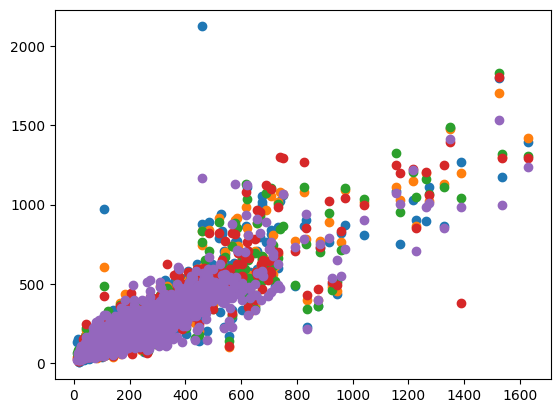

In [635]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'KNN': KNeighborsRegressor()
}

# Train and evaluate each model
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train_values)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test_values, y_pred)
    print(f"MAE for {name}: {mae}")
    plt.scatter(y_test_values, y_pred)
    # Store the trained model
    trained_models[f'model_{name}'] = model


In [622]:
random_forest_model = trained_models['model_Random Forest']

sample_data = [26.24,	62.680000	,4.19,	21.75,	15.67,	24.760000	,1.64	,11.80,	27.05,	0.070000	,0.120000	,False,	False,	True,	False,	False	,False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False,	False	,False	,False,	False	,False,	2018	,9	,3]

sample_data = np.array(sample_data)

scaled_sample_data = scaler.transform(sample_data.reshape(1, -1))
# Make predictions using the Random Forest model
y_pred_rf = random_forest_model.predict(scaled_sample_data)
y_pred_rf


array([95.87])

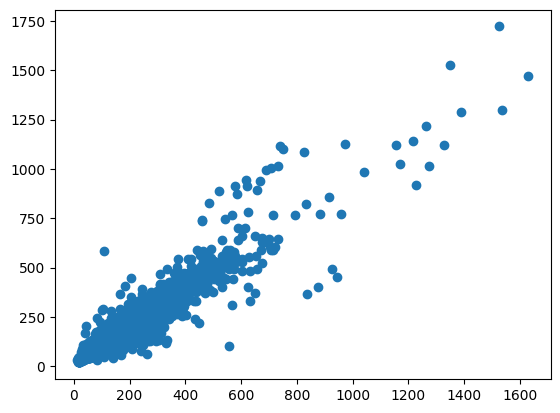

In [636]:
y_pred_plot = random_forest_model.predict(X_test_scaled)
plt.scatter(y_test_values, y_pred_plot)

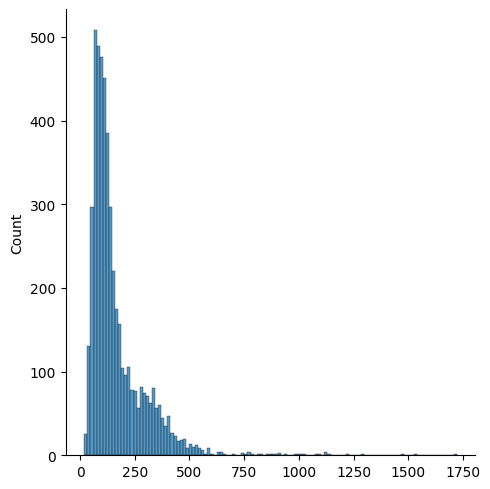

In [637]:
sns.displot(y_pred_plot)

RANDOM FOREST IS NEAREST TO THE ORIGNAL VALUE WHICH IS 98 hence THIS IS THE BEST MODEL OUT OF ALL OTHERS

In [623]:
import pickle

In [624]:
pickle.dump(random_forest_model, open(f'_randomForest_regression_model.pkl', 'wb'))

In [625]:
from joblib import dump

filename = 'random_forest_model.joblib'

dump(random_forest_model, filename)


['random_forest_model.joblib']

In [626]:
import os
print(os.getcwd())

/content


In [627]:
ls

city_day.csv  random_forest_model.joblib  _randomForest_regression_model.pkl  sample_data/


In [628]:
from google.colab import files
files.download('/content/random_forest_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

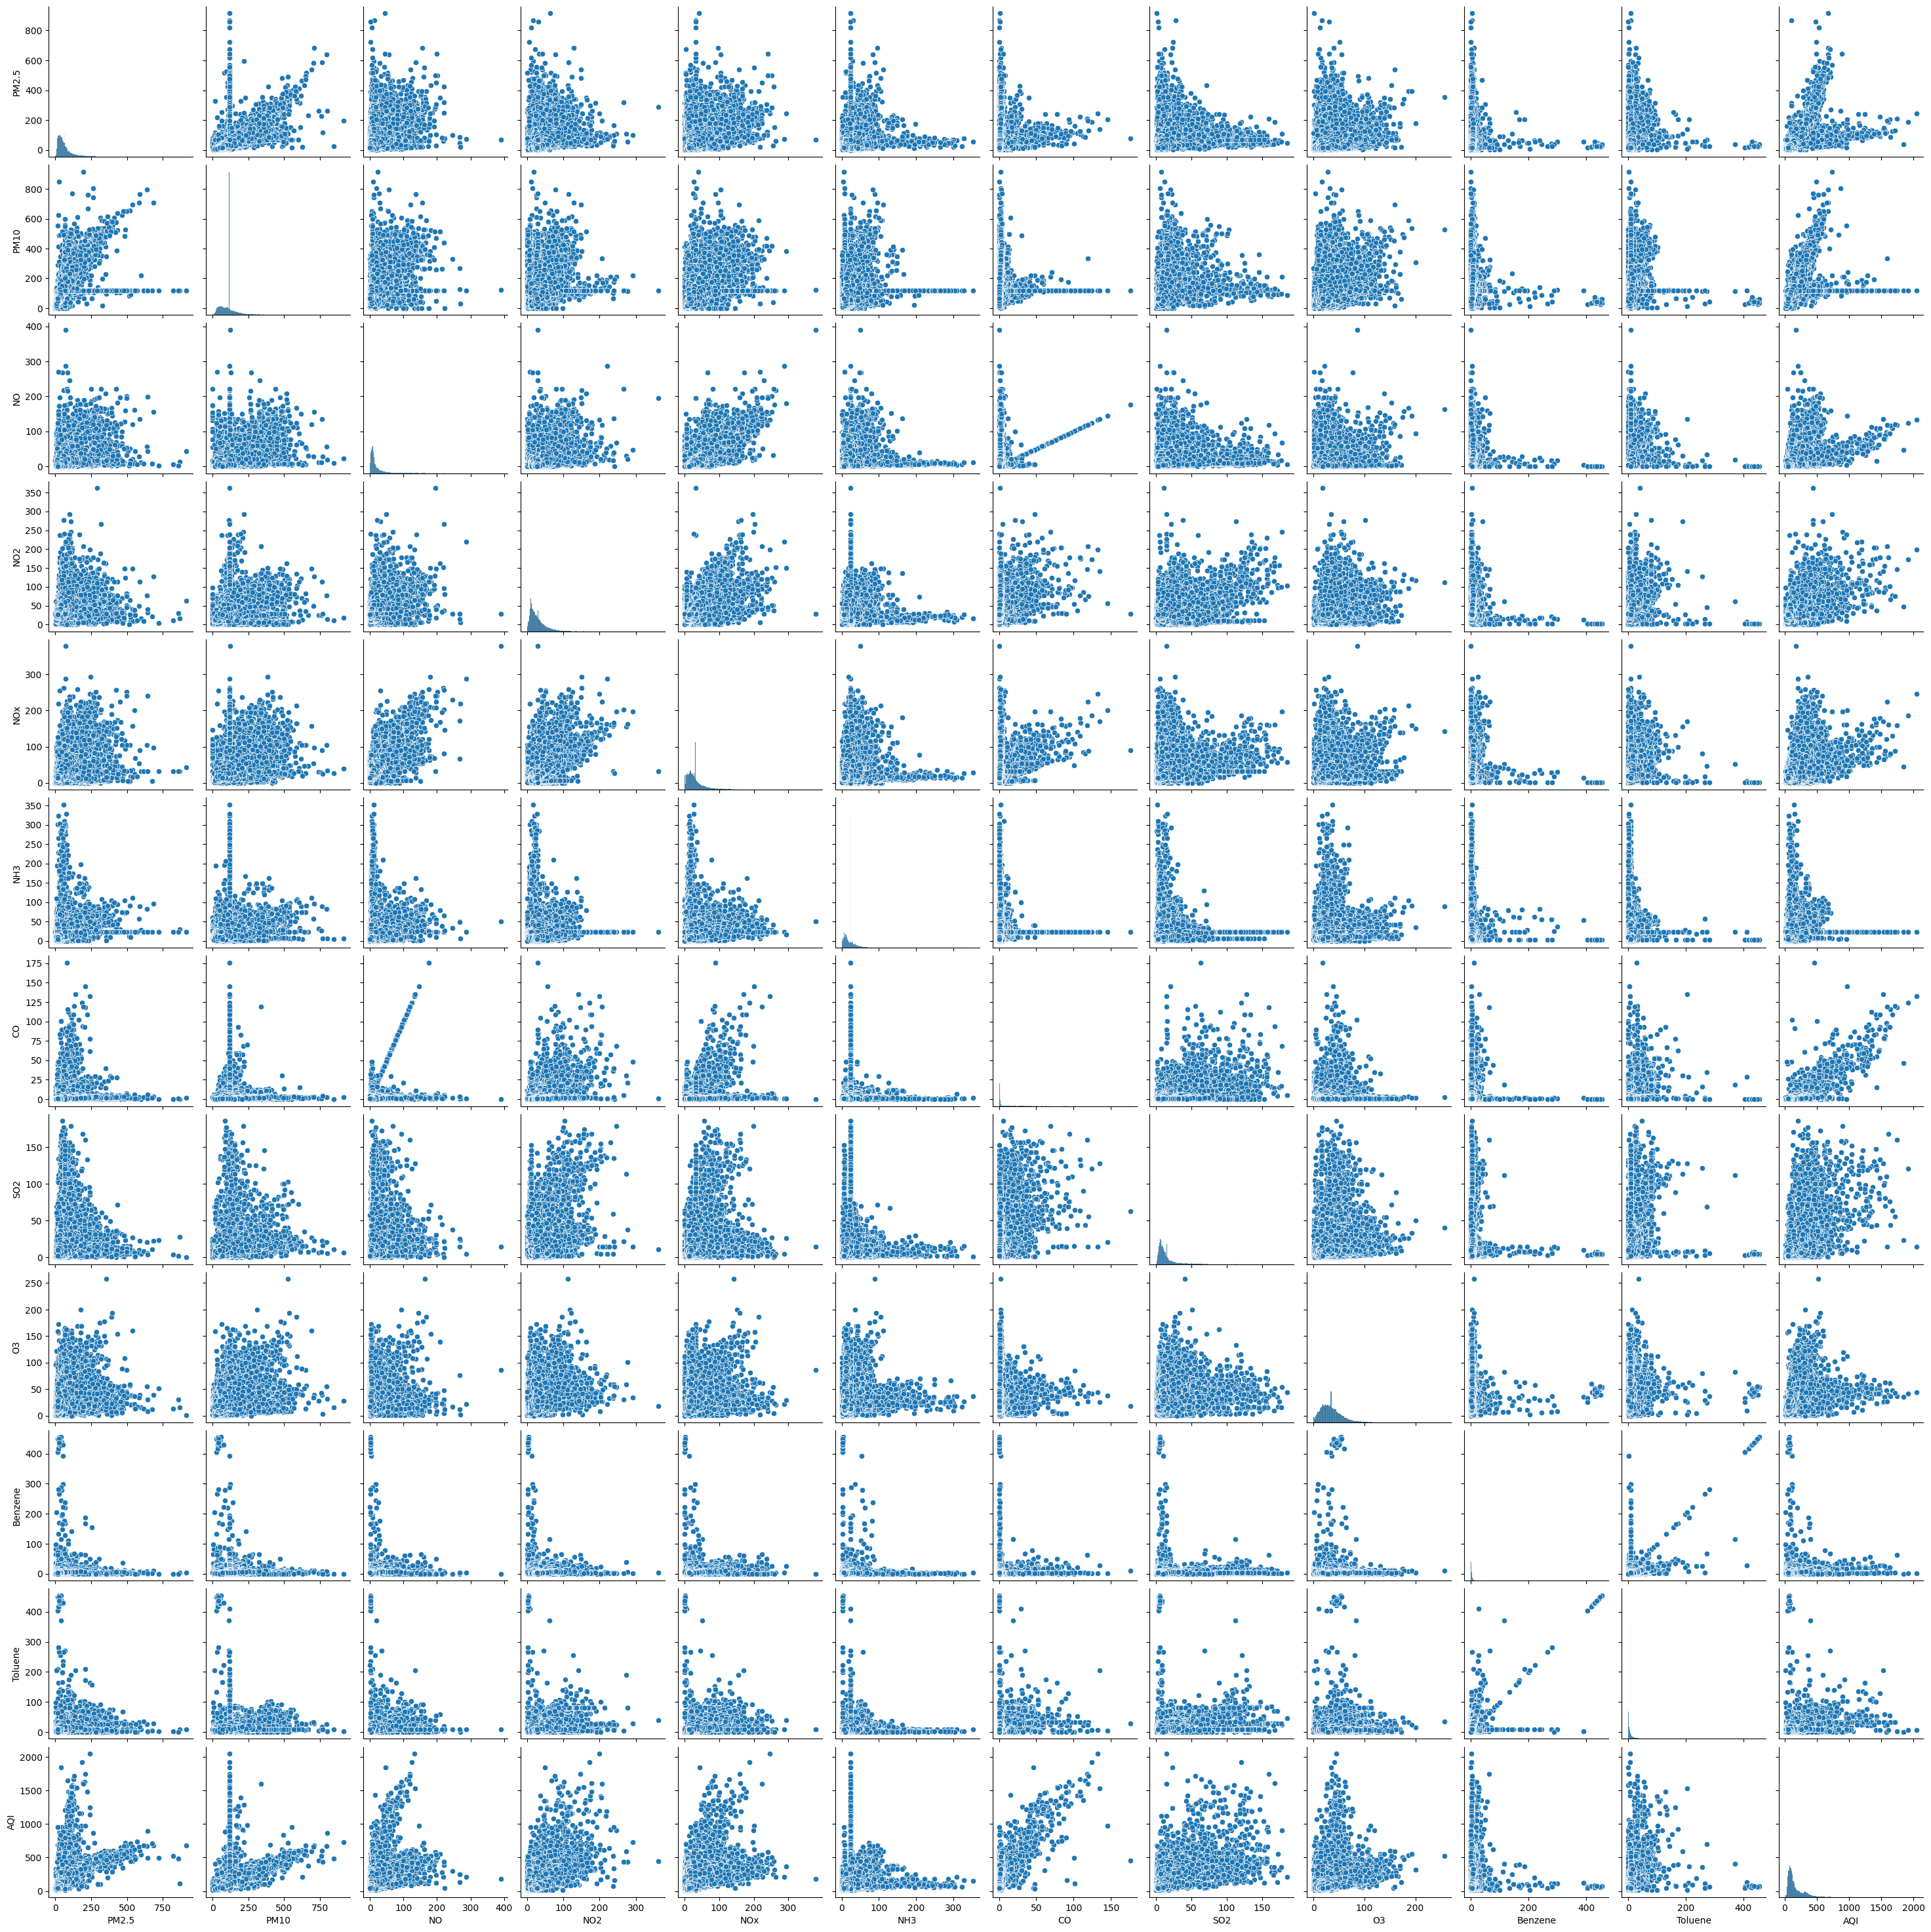

In [639]:
sns.pairplot(df_filtered)

It creates a grid of scatterplots and histograms, allowing you to visualize the pairwise relationships between different features in your dataset. Each subplot in the grid represents the relationship between two variables, while the diagonal shows the distribution of a single variable. Pairplots are particularly useful for identifying patterns, correlations, and outliers in the data, which can help in feature selection, identifying collinearity, and gaining insights into potential relationships between variables. Overall, pairplot provides a comprehensive overview of the dataset's structure, aiding in the initial stages of data exploration and understanding, thereby facilitating better-informed modeling decisions.

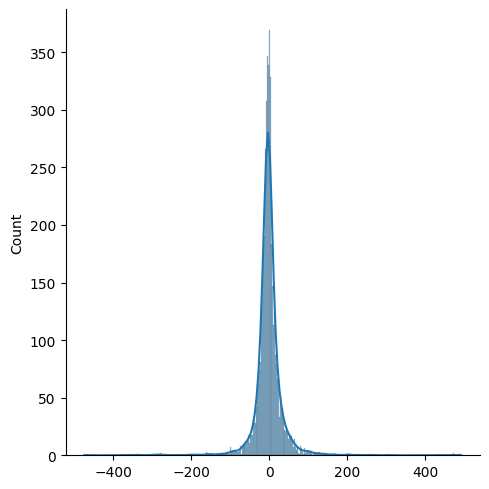

In [641]:
sns.displot(y_test_values - y_pred_plot, kde=True)

it looks like a bell curve , gaussian curve which means our model is performing good

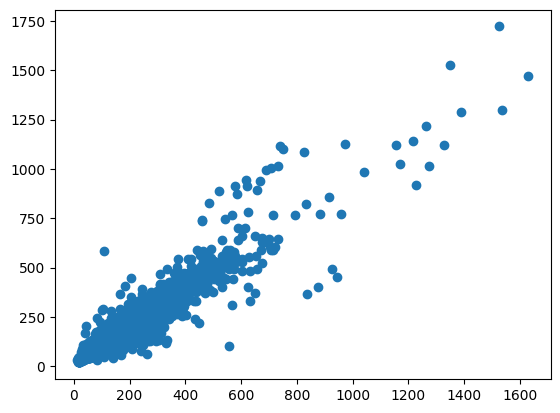

In [642]:
plt.scatter(y_test_values,y_pred_plot)

ideally it should be perfect diagonal line




but scatter plot won't form a perfect diagonal line, but it should still exhibit a pattern where the points are clustered around the diagonal line. This indicates that there's a positive correlation between the predicted and actual values, meaning that the model is making reasonable predictions.
